In [1]:
# Importo paquetes

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# Para ver mejor

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# Cargo el primer train - con la proporción de labels positivos original

train = pd.read_csv("./DATA/CLIC_TRAIN_80porc.csv", sep=';')
test = pd.read_csv("./DATA/CLIC_TEST.csv", sep=';')
train.head(100)

C:\Users\juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Label,action_categorical_0,action_categorical_1,action_categorical_3,action_categorical_5,action_categorical_7,auction_boolean_0,auction_categorical_1,auction_categorical_4,auction_categorical_5,auction_categorical_6,auction_categorical_8,creative_categorical_1,creative_categorical_4,creative_categorical_9,creative_categorical_11,creative_categorical_8,auction_bidfloor,creative_width,creative_height,device_id_type,has_video,timezone_offset,auction_time,ID
0,0,9915ffee,dc24b79b,7ce4e1a3,6bc0e29c,e2538fca,79ceee49,714a9147,7db9dc73,ec8edf0b,ed14c0c3,198c733d,977c2300,150d94b7,65dcab89,65dcab89,Otros,"8,9999999999999997E-2",320,50,c1d12c8e,0,1,1516093081,{91D129EE-4707-4835-BEF6-6C64B1CCF5A2}
1,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,79ceee49,714a9147,ef64698f,ec8edf0b,6f5a8fcb,198c733d,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"7,0000000000000007E-2",320,50,c1d12c8e,0,1,1516452224,{1CE46DD2-DF75-4097-BE63-BFE0A96A5125}
2,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,47980dda,714a9147,ef64698f,ec8edf0b,ed14c0c3,e361d5bc,977c2300,150d94b7,65dcab89,65dcab89,Otros,"0,71428500000000006",320,50,c1d12c8e,0,1,1515999821,{6BD43815-366C-4276-8D33-37EE08555252}
3,0,9915ffee,d9eb38d8,9ebdf82c,6bc0e29c,e2538fca,47980dda,714a9147,7db9dc73,c99696ad,3117d02e,198c733d,977c2300,150d94b7,65dcab89,65dcab89,Otros,"8,9999999999999997E-2",320,50,6324b367,0,1,1516164318,{6625CB3C-99AB-4168-97EA-6D606F70F76C}
4,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,79ceee49,714a9147,7db9dc73,ec8edf0b,Otros,198c733d,977c2300,150d94b7,65dcab89,65dcab89,Otros,"0,20000000000000001",320,50,c1d12c8e,0,1,1516050566,{AD61D36D-F7BE-4D6B-8371-C26C4BA7481A}
5,0,11b7af3d,0d132da2,f51428b0,6bc0e29c,31b31f57,79ceee49,714a9147,7db9dc73,ec8edf0b,Otros,198c733d,35fcfcbb,7f1dcf83,65dcab89,65dcab89,Otros,"8,9999999999999997E-2",320,50,c1d12c8e,0,1,1516115613,{3F230120-E985-4F07-B0A5-94995E334A13}
6,0,c2e4f717,e709bbc0,e7329a92,6bc0e29c,e2538fca,43c867fd,714a9147,ef64698f,c99696ad,Otros,Otros,977c2300,150d94b7,65dcab89,65dcab89,Otros,"0,02",0,0,6324b367,0,1,1516315602,{77AF7384-F3AC-466B-8237-2D85837F6AB9}
7,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,79ceee49,714a9147,ef64698f,ec8edf0b,e70caf72,198c733d,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"0,10000000000000001",320,50,c1d12c8e,0,1,1516274017,{516A6F43-570B-4032-95C6-9765633E6CA0}
8,0,9915ffee,d9eb38d8,9ebdf82c,6bc0e29c,e2538fca,47980dda,714a9147,ef64698f,c99696ad,ed14c0c3,198c733d,977c2300,150d94b7,65dcab89,65dcab89,Otros,"8,9999999999999997E-2",300,250,6324b367,0,1,1516437491,{1A9B1B2B-87B2-49D9-9D3F-8D78338C7347}
9,0,11b7af3d,0d132da2,f51428b0,6bc0e29c,31b31f57,47980dda,714a9147,ef64698f,ec8edf0b,0fa26b70,856f1b75,35fcfcbb,7f1dcf83,65dcab89,65dcab89,Otros,"0,25641025641025639",728,90,c1d12c8e,0,1,1516498635,{6D2544B8-3926-46BF-8C87-C7D58019D046}


In [4]:
train.Label.value_counts()

1    102003
0     25501
Name: Label, dtype: int64

In [5]:
train.columns

Index(['Label', 'action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8', 'auction_bidfloor',
       'creative_width', 'creative_height', 'device_id_type', 'has_video',
       'timezone_offset', 'auction_time', 'ID'],
      dtype='object')

In [6]:
train.dtypes

Label                       int64
action_categorical_0       object
action_categorical_1       object
action_categorical_3       object
action_categorical_5       object
action_categorical_7       object
auction_boolean_0          object
auction_categorical_1      object
auction_categorical_4      object
auction_categorical_5      object
auction_categorical_6      object
auction_categorical_8      object
creative_categorical_1     object
creative_categorical_4     object
creative_categorical_9     object
creative_categorical_11    object
creative_categorical_8     object
auction_bidfloor           object
creative_width              int64
creative_height             int64
device_id_type             object
has_video                   int64
timezone_offset            object
auction_time                int64
ID                         object
dtype: object

In [7]:
train.isnull().sum()

Label                          0
action_categorical_0           0
action_categorical_1           0
action_categorical_3           0
action_categorical_5           0
action_categorical_7           0
auction_boolean_0           1497
auction_categorical_1          0
auction_categorical_4         98
auction_categorical_5          0
auction_categorical_6          0
auction_categorical_8          0
creative_categorical_1         0
creative_categorical_4     44863
creative_categorical_9      1207
creative_categorical_11        0
creative_categorical_8         0
auction_bidfloor               0
creative_width                 0
creative_height                0
device_id_type                 0
has_video                      0
timezone_offset                0
auction_time                   0
ID                             0
dtype: int64

In [8]:
# Covertir Obj a Float

train['auction_bidfloor'] = train['auction_bidfloor'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))
test['auction_bidfloor'] = test['auction_bidfloor'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))

train['timezone_offset'] = train['timezone_offset'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))
test['timezone_offset'] = test['timezone_offset'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [9]:
train.isnull().sum()

Label                          0
action_categorical_0           0
action_categorical_1           0
action_categorical_3           0
action_categorical_5           0
action_categorical_7           0
auction_boolean_0           1497
auction_categorical_1          0
auction_categorical_4         98
auction_categorical_5          0
auction_categorical_6          0
auction_categorical_8          0
creative_categorical_1         0
creative_categorical_4     44863
creative_categorical_9      1207
creative_categorical_11        0
creative_categorical_8         0
auction_bidfloor               0
creative_width                 0
creative_height                0
device_id_type                 0
has_video                      0
timezone_offset            65536
auction_time                   0
ID                             0
dtype: int64

In [10]:
# Creamos dummies para train y para test

categories = ['action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8',
       'device_id_type']

for category in categories:
    series = train[category]
    dummies = pd.get_dummies(series, prefix=category,  drop_first=True)
    train = pd.concat([train, dummies], axis=1)
    
for category in categories:
    series = test[category]
    dummies = pd.get_dummies(series, prefix=category, drop_first=True)
    test = pd.concat([test, dummies], axis=1)

In [11]:
train.columns

Index(['Label', 'action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8', 'auction_bidfloor',
       'creative_width', 'creative_height', 'device_id_type', 'has_video',
       'timezone_offset', 'auction_time', 'ID',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'ac

In [12]:
test.columns == train.columns

ValueError: Lengths must match to compare

In [13]:
train.describe()

,Label,auction_bidfloor,creative_width,creative_height,has_video,timezone_offset,auction_time,action_categorical_0_604d011f,action_categorical_0_9915ffee,action_categorical_0_Otros,action_categorical_0_c2e4f717,action_categorical_0_e350c7c7,action_categorical_1_3074db21,action_categorical_1_6d1ca31b,action_categorical_1_Otros,action_categorical_1_ac0f362d,action_categorical_1_d9eb38d8,action_categorical_1_dc24b79b,action_categorical_1_e220fce9,action_categorical_1_e709bbc0,action_categorical_1_f71d2f9b,action_categorical_3_62c903fc,action_categorical_3_7ce4e1a3,action_categorical_3_9ebdf82c,action_categorical_3_Otros,action_categorical_3_cb80abab,action_categorical_3_e7329a92,action_categorical_3_e9c266f7,action_categorical_3_f51428b0,action_categorical_5_79ceee49,action_categorical_7_e2538fca,auction_boolean_0_47980dda,auction_boolean_0_79ceee49,auction_categorical_1_714a9147,auction_categorical_1_ababfacb,auction_categorical_4_ef64698f,auction_categorical_5_ec8edf0b,auction_categorical_6_3117d02e,auction_categorical_6_434922cf,auction_categorical_6_6f5a8fcb,auction_categorical_6_7d7776ec,auction_categorical_6_Otros,auction_categorical_6_e70caf72,auction_categorical_6_ed14c0c3,auction_categorical_6_fccb6ea5,auction_categorical_8_856f1b75,auction_categorical_8_Otros,auction_categorical_8_e361d5bc,creative_categorical_1_977c2300,creative_categorical_4_7f1dcf83,creative_categorical_4_f3b258d1,creative_categorical_9_65dcab89,creative_categorical_11_65dcab89,creative_categorical_8_5e63aaac,creative_categorical_8_Otros,creative_categorical_8_d9d53fe0,device_id_type_6324b367,device_id_type_88bcf6c1,device_id_type_c1d12c8e
count,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,61968.000000,1.275040e+05,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000,127504.000000
mean,0.799998,1.163390,216.004235,147.919093,0.071441,1.915771,1.516323e+09,0.254204,0.226918,0.114177,0.125416,0.115220,0.071715,0.044210,0.078319,0.127753,0.166936,0.059982,0.115220,0.053700,0.245851,0.071715,0.059982,0.166936,0.146105,0.127753,0.053700,0.115220,0.036313,0.292752,0.618051,0.788116,0.190739,0.682700,0.029121,0.736824,0.257223,0.063880,0.102052,0.044853,0.068249,0.164332,0.054132,0.216362,0.125345,0.065747,0.113863,0.116498,0.734173,0.210911,0.014831,0.796140,0.660654,0.000008,0.972660,0.014831,0.734557,0.000008,0.257215
std,0.400003,1.970457,171.659639,177.983746,0.257561,2.239681,1.753290e+05,0.435414,0.418841,0.318027,0.331191,0.319288,0.258017,0.205563,0.268674,0.333816,0.372920,0.237455,0.319288,0.225426,0.430592,0.258017,0.237455,0.372920,0.353213,0.333816,0.225426,0.319288,0.187068,0.455027,0.485866,0.408644,0.392885,0.465427,0.168145,0.440359,0.437105,0.244541,0.302717,0.206983,0.252173,0.370578,0.226278,0.411765,0.331111,0.247840,0.317646,0.320823,0.441774,0.407957,0.120876,0.402868,0.473489,0.002801,0.163074,0.120876,0.441570,0.002801,0.437101
min,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1.515975e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [14]:
y_train = train[['Label']]
x_train = train[['auction_bidfloor',
       'creative_width', 'creative_height', 'has_video',
       'auction_time',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'action_categorical_1_e220fce9',
       'action_categorical_1_e709bbc0', 'action_categorical_1_f71d2f9b',
       'action_categorical_3_62c903fc', 'action_categorical_3_7ce4e1a3',
       'action_categorical_3_9ebdf82c', 'action_categorical_3_Otros',
       'action_categorical_3_cb80abab', 'action_categorical_3_e7329a92',
       'action_categorical_3_e9c266f7', 'action_categorical_3_f51428b0',
       'action_categorical_5_79ceee49', 'action_categorical_7_e2538fca',
       'auction_boolean_0_47980dda', 'auction_boolean_0_79ceee49',
       'auction_categorical_1_714a9147', 'auction_categorical_1_ababfacb',
       'auction_categorical_4_ef64698f', 'auction_categorical_5_ec8edf0b',
       'auction_categorical_6_3117d02e', 'auction_categorical_6_434922cf',
       'auction_categorical_6_6f5a8fcb', 'auction_categorical_6_7d7776ec',
       'auction_categorical_6_Otros', 'auction_categorical_6_e70caf72',
       'auction_categorical_6_ed14c0c3', 'auction_categorical_6_fccb6ea5',
       'auction_categorical_8_856f1b75', 'auction_categorical_8_Otros',
       'auction_categorical_8_e361d5bc', 'creative_categorical_1_977c2300',
       'creative_categorical_4_7f1dcf83', 'creative_categorical_4_f3b258d1',
       'creative_categorical_9_65dcab89', 'creative_categorical_11_65dcab89',
       'creative_categorical_8_5e63aaac', 'creative_categorical_8_Otros',
       'creative_categorical_8_d9d53fe0', 'device_id_type_6324b367',
       'device_id_type_c1d12c8e']]

y_test = test[['Label']]
x_test = test[['auction_bidfloor',
       'creative_width', 'creative_height', 'has_video',
       'auction_time',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'action_categorical_1_e220fce9',
       'action_categorical_1_e709bbc0', 'action_categorical_1_f71d2f9b',
       'action_categorical_3_62c903fc', 'action_categorical_3_7ce4e1a3',
       'action_categorical_3_9ebdf82c', 'action_categorical_3_Otros',
       'action_categorical_3_cb80abab', 'action_categorical_3_e7329a92',
       'action_categorical_3_e9c266f7', 'action_categorical_3_f51428b0',
       'action_categorical_5_79ceee49', 'action_categorical_7_e2538fca',
       'auction_boolean_0_47980dda', 'auction_boolean_0_79ceee49',
       'auction_categorical_1_714a9147', 'auction_categorical_1_ababfacb',
       'auction_categorical_4_ef64698f', 'auction_categorical_5_ec8edf0b',
       'auction_categorical_6_3117d02e', 'auction_categorical_6_434922cf',
       'auction_categorical_6_6f5a8fcb', 'auction_categorical_6_7d7776ec',
       'auction_categorical_6_Otros', 'auction_categorical_6_e70caf72',
       'auction_categorical_6_ed14c0c3', 'auction_categorical_6_fccb6ea5',
       'auction_categorical_8_856f1b75', 'auction_categorical_8_Otros',
       'auction_categorical_8_e361d5bc', 'creative_categorical_1_977c2300',
       'creative_categorical_4_7f1dcf83', 'creative_categorical_4_f3b258d1',
       'creative_categorical_9_65dcab89', 'creative_categorical_11_65dcab89',
       'creative_categorical_8_5e63aaac', 'creative_categorical_8_Otros',
       'creative_categorical_8_d9d53fe0', 'device_id_type_6324b367',
       'device_id_type_c1d12c8e']]

del train, test

In [15]:
x_test.dtypes

auction_bidfloor                    float64
creative_width                        int64
creative_height                       int64
has_video                             int64
auction_time                          int64
action_categorical_0_604d011f         uint8
action_categorical_0_9915ffee         uint8
action_categorical_0_Otros            uint8
action_categorical_0_c2e4f717         uint8
action_categorical_0_e350c7c7         uint8
action_categorical_1_3074db21         uint8
action_categorical_1_6d1ca31b         uint8
action_categorical_1_Otros            uint8
action_categorical_1_ac0f362d         uint8
action_categorical_1_d9eb38d8         uint8
action_categorical_1_dc24b79b         uint8
action_categorical_1_e220fce9         uint8
action_categorical_1_e709bbc0         uint8
action_categorical_1_f71d2f9b         uint8
action_categorical_3_62c903fc         uint8
action_categorical_3_7ce4e1a3         uint8
action_categorical_3_9ebdf82c         uint8
action_categorical_3_Otros      

In [16]:
# Normalización

se = StandardScaler()
x_train = se.fit_transform(x_train)
x_test = se.transform(x_test)

In [17]:
models = [GaussianNB(), LogisticRegression()]

In [18]:
params = [[{}],[{'C': [0.01, 0.1, 1, 10, 100] }]]

In [19]:
grids = []
i = 0
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=3, n_jobs=-1, verbose=10)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)

GridSearchCV(cv=3, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=-1, param_grid=[{}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    6.1s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   13.6s remaining:   37.6s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   19.6s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   26.3s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   30.1s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   32.6s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   36.5s finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_probs = []
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)
    y_pred = i.predict(x_test)
    print (confusion_matrix(y_test, y_pred))
    y_aux = i.predict_proba(x_test)
    y_probs.append(y_aux[:,1])

0.3187115698331033
GaussianNB(priors=None)
{}
[[ 92976 153759]
 [   394   2808]]
0.27901085456142555
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'C': 0.01}
[[ 62023 184712]
 [   157   3045]]


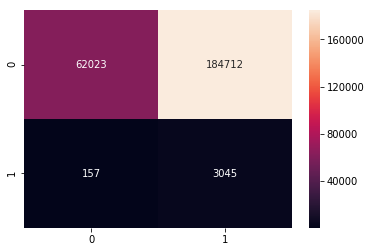

In [21]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [22]:
y_probs

[array([9.99999791e-01, 8.25879801e-07, 1.41941874e-04, ...,
        9.99933889e-01, 9.99996287e-01, 9.99999998e-01]),
 array([0.90280246, 0.3949229 , 0.51817636, ..., 0.57425453, 0.6547115 ,
        0.69904139])]

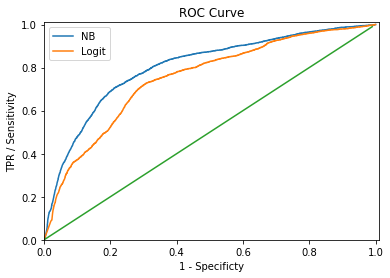

In [23]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs[0])
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show() 

In [24]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.8020976267353321
AUC-Logit= 0.7492690502990923


In [25]:
models = [svm.SVC(),
          KNeighborsClassifier()]

In [26]:
params = [
    
    [
        {'C': [10], 'kernel': ['linear']},
          
        {'C': [10], 'gamma': [0.01], 'kernel': ['rbf']}
    ],
          {'n_neighbors': [3,5],
           'weights' : ['uniform'],
           'p' : [1]}
]

In [ ]:
# Con estos modelos tarda mil años...

for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=3, n_jobs=-1, verbose=10)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [10], 'kernel': ['linear']}, {'C': [10], 'gamma': [0.01], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
